In [283]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

In [284]:
# data
path_X = 'nuclear_x.csv'
path_y = 'nuclear_y.csv'
path=[path_X,path_y]

for i in range(2):
    with open(path[i], encoding='utf-8') as f:
        if i ==0:
            X = np.loadtxt(path[i],delimiter=',') #20000,2
        else:
            y = np.loadtxt(path[i], delimiter=',')

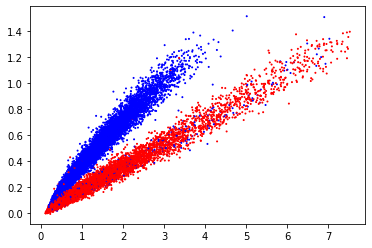

In [285]:
# visualization
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=['red' if label == -1 else 'blue' for label in y],s=1)

In [299]:
# initialize weight and bias
np.random.seed(42)
w = np.random.rand(2,1)
b = np.random.randn(1)

((2, 1), (1,))

In [239]:
theta = np.concatenate((b,w.T),axis=1).T # 3,1 [b;w1;w2]
x_aug = np.concatenate((np.ones((x.shape[0],1)),x),axis=1) #20000,3 [1,x1,x2]
n = len(x_aug)
theta

array([[0.64768854],
       [0.37454012],
       [0.95071431]])

In [349]:
mask =  y.reshape(-1,1)*np.dot(x_aug,theta)<1
y.shape,y.reshape(-1,1).shape

((20000,), (20000, 1))

In [240]:
def subgrad(x_aug,y,theta,lam=0.001):
    n = len(x_aug)
    w = np.concatenate((np.zeros((1,1)),theta[1:,:].T),axis=1).T # 3,1 [b;w1;w2]
    mask =  y.reshape(-1,1)*np.dot(x_aug,theta)<1



In [282]:
#initialize guess
theta -= 0.01*subgrad(x_aug[0],y[0],theta)
theta

array([[0.64768854],
       [0.37448769],
       [0.95058122]])